Model building

Visualization (2D using PCA)

Prediction on unknown instance

Hyperparameter tuning using GridSearchCV

In [1]:
# Step 1: Import Libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Step 2: Load Dataset
iris = load_iris()
X = iris.data
y = iris.target



In [3]:
# Step 3: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [4]:
# Step 4: Build KNN Model (k=3 default)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [5]:
# Step 5: Predict and Evaluate
y_pred = knn.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))




Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 1.0



Predicted class for unknown instance: versicolor


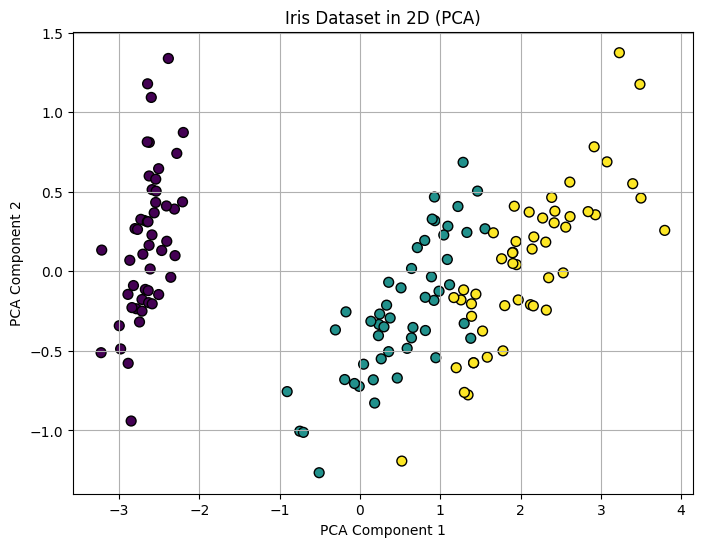

In [6]:
# Step 6: Predict on Unknown Instance
unknown = [[5.5, 2.5, 4.0, 1.3]]
prediction = knn.predict(unknown)
print("\nPredicted class for unknown instance:", iris.target_names[prediction[0]])

# Step 7: PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Iris Dataset in 2D (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()




In [7]:
# Step 8: Grid Search for Best k (n_neighbors)
param_grid = {
    'n_neighbors': list(range(1, 11)),  # try k from 1 to 10
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:", grid_search.best_params_)




Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [8]:
# Step 9: Evaluate Best Model
best_knn = grid_search.best_estimator_
y_best_pred = best_knn.predict(X_test)
print("Accuracy with Best KNN:", accuracy_score(y_test, y_best_pred))

Accuracy with Best KNN: 1.0
